In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fredapi as fd
import plotly.express as px
import certifi
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

fred=fd.Fred(api_key='951ac541bdb1a9e9977eb2695845cff6')
data=fred.search('Consumer Price Index for All Urban Consumers: All Items in U.S. City Average')
data.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2024-04-09,2024-04-09,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2024-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-03-12 07:42:02-05:00,95,The Consumer Price Index for All Urban Consume...
CPIAUCNS,CPIAUCNS,2024-04-09,2024-04-09,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2024-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-03-12 07:42:05-05:00,73,Handbook of Methods (https://www.bls.gov/opub/...
CUUS0000SA0,CUUS0000SA0,2024-04-09,2024-04-09,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-01-11 07:40:07-06:00,46,None
CPILFESL,CPILFESL,2024-04-09,2024-04-09,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-03-12 07:42:02-05:00,82,"The ""Consumer Price Index for All Urban Consum..."
CPILFENS,CPILFENS,2024-04-09,2024-04-09,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-03-12 07:42:13-05:00,53,The “Consumer Price Index for All Urban Consum...
CUUS0000SA0L1E,CUUS0000SA0L1E,2024-04-09,2024-04-09,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-01-11 07:40:13-06:00,10,None
APU0000708111,APU0000708111,2024-04-09,2024-04-09,"Average Price: Eggs, Grade A, Large (Cost per ...",1980-01-01,2024-02-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-03-12 07:35:01-05:00,76,"Large white, Grade A chicken eggs, sold in a c..."
APU0000703112,APU0000703112,2024-04-09,2024-04-09,"Average Price: Ground Beef, 100% Beef (Cost pe...",1984-01-01,2024-02-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-03-12 07:35:02-05:00,68,Fresh regular 100% ground beef excluding round...
APU0000702111,APU0000702111,2024-04-09,2024-04-09,"Average Price: Bread, White, Pan (Cost per Pou...",1980-01-01,2024-02-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-03-12 07:35:01-05:00,68,All white pre-packaged regular bread regardles...


In [60]:
cpi = fred.get_series('CPIAUCSL')
cpi.name = 'values'
cpi
df=pd.DataFrame(cpi).reset_index()




In [64]:
from fredapi import Fred
import pandas as pd

# Provide your actual API key
api_key = '951ac541bdb1a9e9977eb2695845cff6'

fred = Fred(api_key=api_key)

# Ensure correct FRED series IDs
indicators = {
    'Unemployment Rate': 'UNRATE',
    'Nonfarm Payrolls': 'PAYEMS',
    'Real GDP': 'GDPC1',
    'GDP Growth Rate': 'A191RL1Q225SBEA',
    'CPI All Items': 'CPIAUCSL',
    'Core CPI': 'CPILFESL',
    'PPI All Commodities': 'PPIACO',
    'PPI Core': 'PPIACO',
    'Industrial Production': 'INDPRO',
    'Retail Sales Total': 'RSAFS',
    'Housing Starts': 'HOUST',
    'Existing Home Sales': 'EXHOSLUSM495S',
    'Federal Funds Rate': 'FEDFUNDS',
    'Money Supply M1': 'M1',
    'Money Supply M2': 'M2',
    'S&P 500 Index': 'SP500',
    '10-Year Treasury Yield': 'GS10',
    'Trade Balance': 'NETEXC',
    'Exchange Rate Indexes': 'DTWEXM',
    'Federal Budget Balance': 'FYFSD',
    'Government Debt-to-GDP Ratio': 'GFDEGDQ188S'
}

# Check date range
start_date = '1940-01-01'
end_date = '2023-12-31'  # Adjusted to ensure data for 12/31/2023

data = {}
for indicator_name, series_id in indicators.items():
    try:
        data[indicator_name] = fred.get_series(series_id, start=start_date, end=end_date)
    except Exception as e:
        print(f"Error retrieving data for {indicator_name}: {e}")

# Create the DataFrame
df = pd.DataFrame(data)

# Handle potential missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values
df.fillna(method='bfill', inplace=True)  # Backward fill remaining missing values

print(df.head())  # Print the first few rows to check if data is retrieved correctly


            Unemployment Rate  Nonfarm Payrolls  Real GDP  GDP Growth Rate  \
1901-06-30                3.4           29923.0  2182.681             -1.0   
1902-06-30                3.4           29923.0  2182.681             -1.0   
1903-06-30                3.4           29923.0  2182.681             -1.0   
1904-06-30                3.4           29923.0  2182.681             -1.0   
1905-06-30                3.4           29923.0  2182.681             -1.0   

            CPI All Items  Core CPI  PPI All Commodities  PPI Core  \
1901-06-30          21.48      28.5                 12.1      12.1   
1902-06-30          21.48      28.5                 12.1      12.1   
1903-06-30          21.48      28.5                 12.1      12.1   
1904-06-30          21.48      28.5                 12.1      12.1   
1905-06-30          21.48      28.5                 12.1      12.1   

            Industrial Production  Retail Sales Total  ...  \
1901-06-30                 4.8665            164

/var/folders/fc/s14cb1f167bc9d6mxmyf2rc80000gn/T/ipykernel_34376/3742803717.py:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values
/var/folders/fc/s14cb1f167bc9d6mxmyf2rc80000gn/T/ipykernel_34376/3742803717.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill remaining missing values


In [32]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   926 non-null    datetime64[ns]
 1   values  926 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.6 KB
None
index     0
values    0
dtype: int64


In [33]:
print(df.describe())


                               index      values
count                            926  926.000000
mean   1985-07-16 18:25:39.524838016  119.437087
min              1947-01-01 00:00:00   21.480000
25%              1966-04-08 12:00:00   32.297500
50%              1985-07-16 12:00:00  107.800000
75%              2004-10-24 06:00:00  191.400000
max              2024-02-01 00:00:00  311.054000
std                              NaN   85.211463


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of Unemployment Rate
plt.hist(df['Unemployment Rate'], bins=20)
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Unemployment Rate')
plt.show()

# Example: Scatter plot between Real GDP and GDP Growth Rate
plt.scatter(df['Real GDP'], df['GDP Growth Rate'])
plt.xlabel('Real GDP')
plt.ylabel('GDP Growth Rate')
plt.title('Scatter plot between Real GDP and GDP Growth Rate')
plt.show()

# You can create more plots based on your variables of interest


KeyError: 'Unemployment Rate'

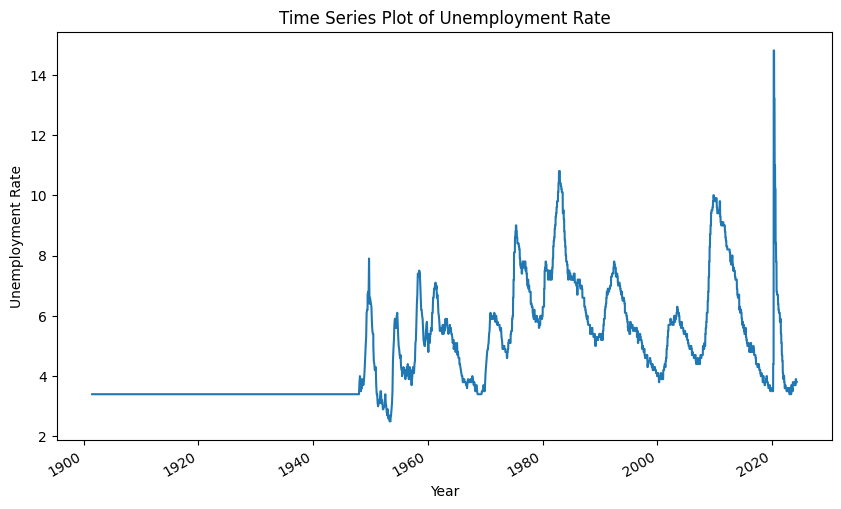

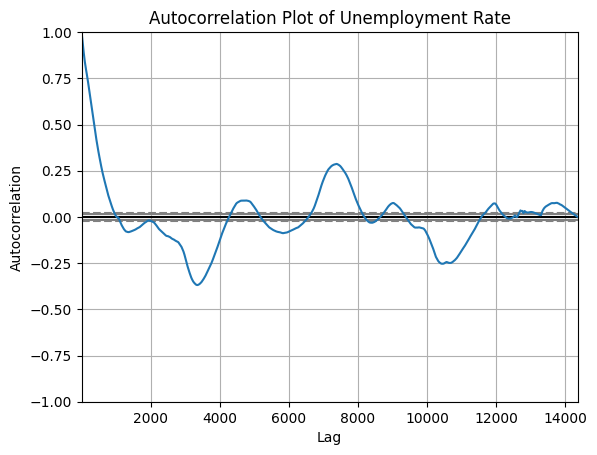

In [65]:
# Example: Time series plot of Unemployment Rate
df['Unemployment Rate'].plot(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Time Series Plot of Unemployment Rate')
plt.show()

# Example: Autocorrelation plot of Unemployment Rate
pd.plotting.autocorrelation_plot(df['Unemployment Rate'])
plt.title('Autocorrelation Plot of Unemployment Rate')
plt.show()

# You can perform decomposition using seasonal_decompose from statsmodels



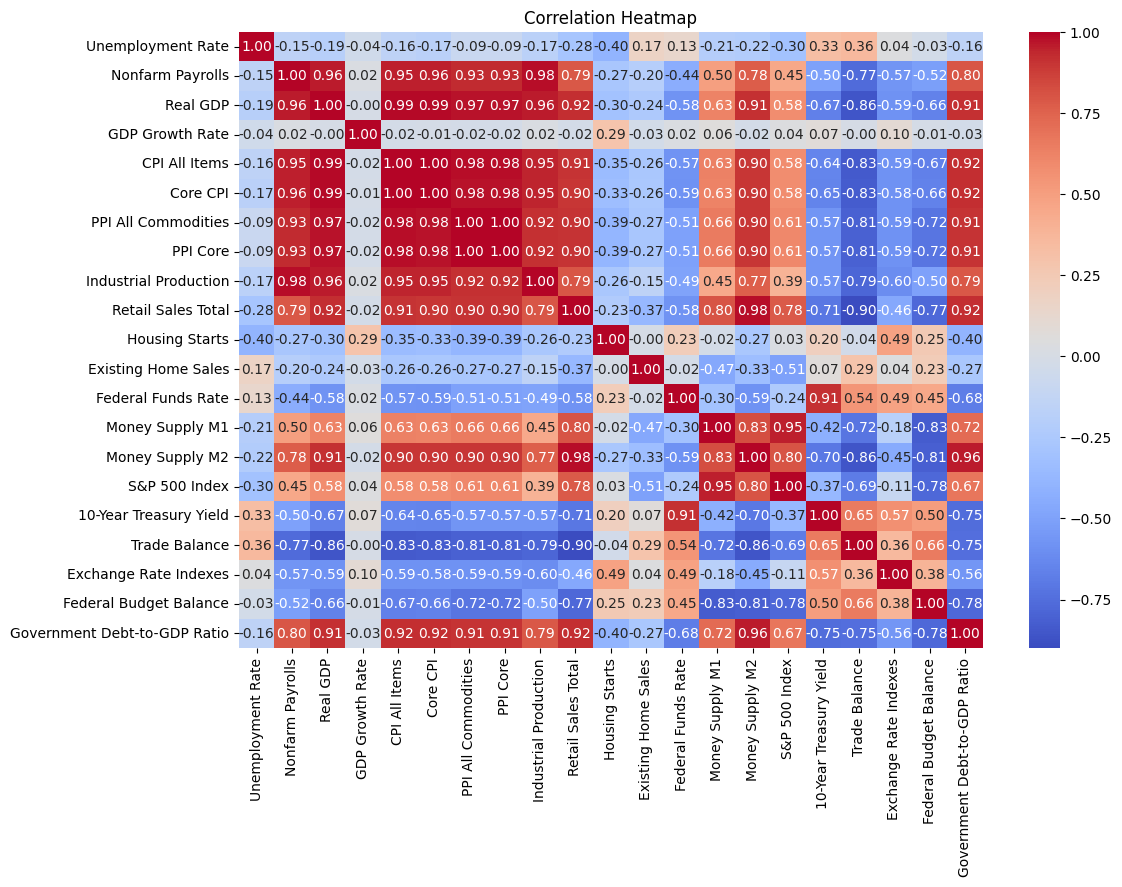

In [66]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


/var/folders/fc/s14cb1f167bc9d6mxmyf2rc80000gn/T/ipykernel_34376/925139534.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


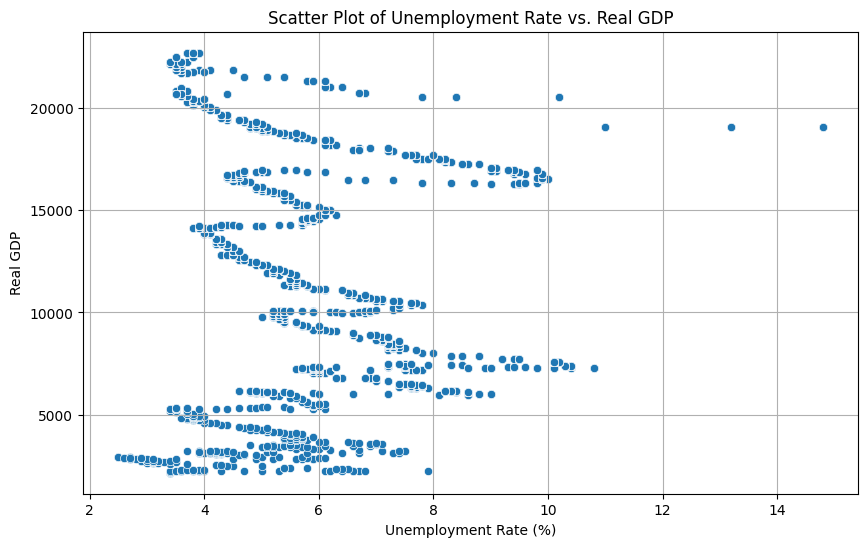

Correlation Coefficient between Unemployment Rate and Real GDP: -0.18942566772643615


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your economic data into a DataFrame named 'df'
# Ensure that 'Unemployment Rate' and 'Real GDP' columns exist in your DataFrame

# Selecting relevant columns for analysis
df_selected = df[['Unemployment Rate', 'Real GDP']]

# Drop rows with missing values
df_selected.dropna(inplace=True)

# Plotting scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Unemployment Rate', y='Real GDP')
plt.title('Scatter Plot of Unemployment Rate vs. Real GDP')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Real GDP')
plt.grid(True)
plt.show()

# Compute correlation coefficient
correlation = df_selected['Unemployment Rate'].corr(df_selected['Real GDP'])
print(f"Correlation Coefficient between Unemployment Rate and Real GDP: {correlation}")


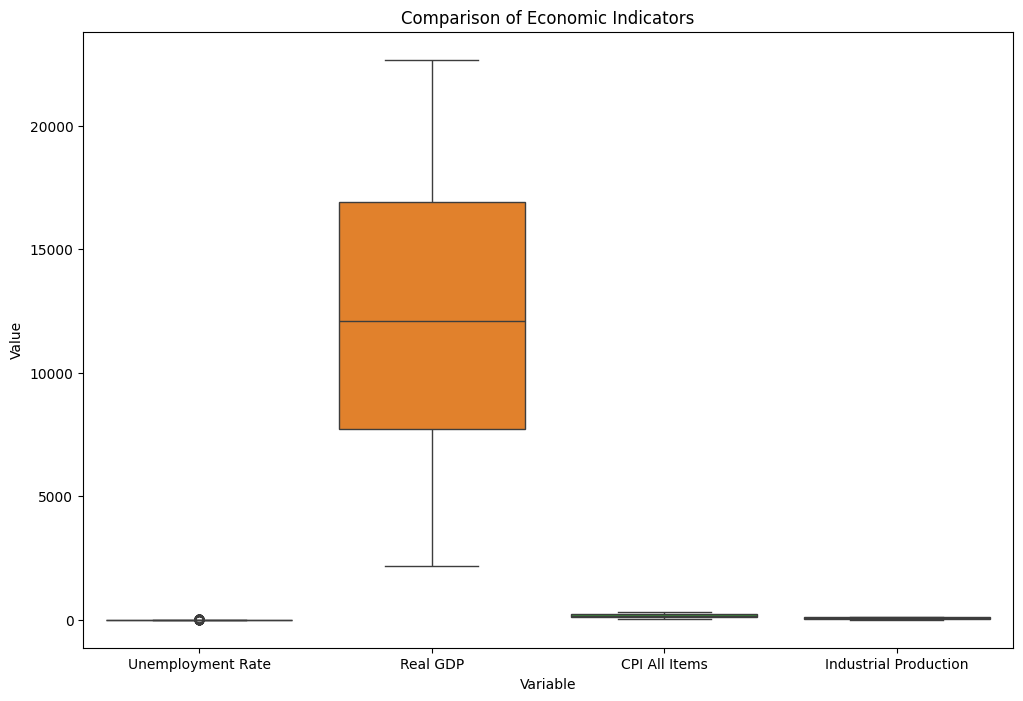

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select variables for comparison
variables_to_compare = ['Unemployment Rate', 'Real GDP', 'CPI All Items', 'Industrial Production']

# Plot box plots for comparison
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[variables_to_compare])
plt.title('Comparison of Economic Indicators')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()



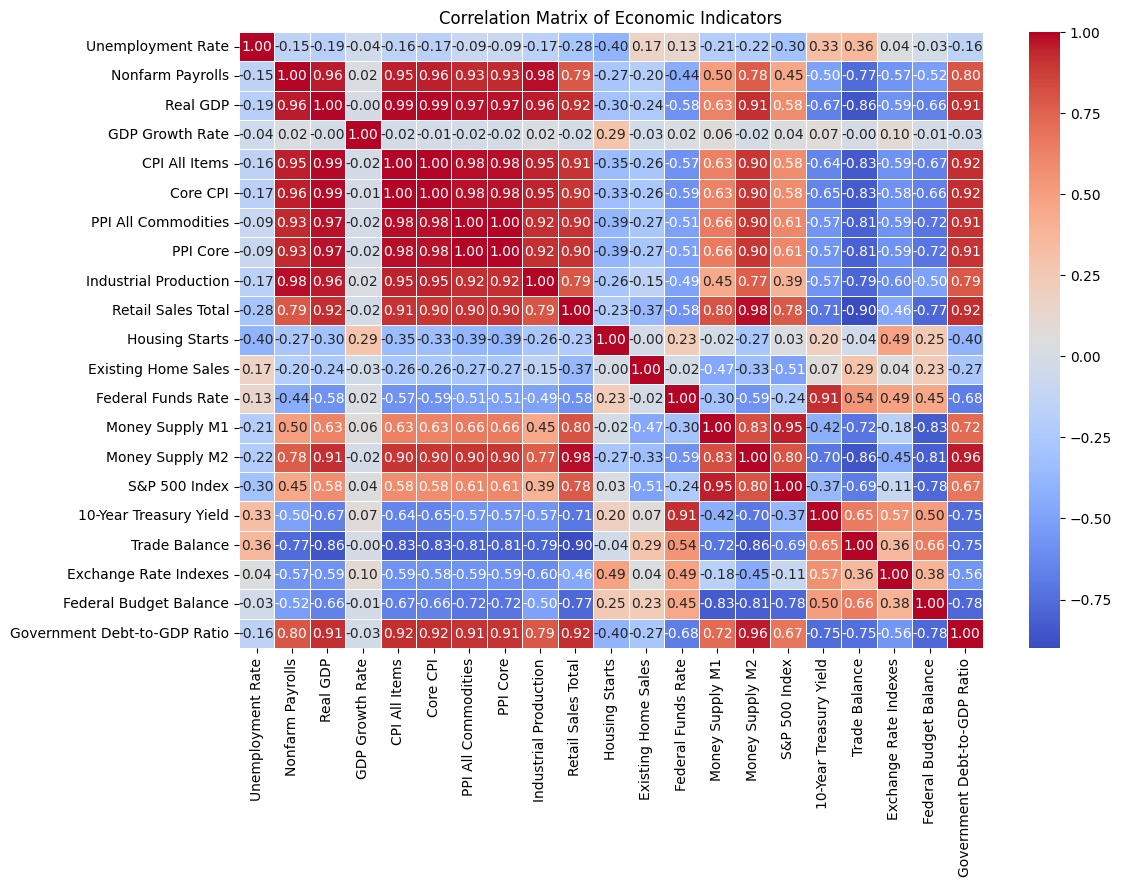

<Figure size 1200x800 with 0 Axes>

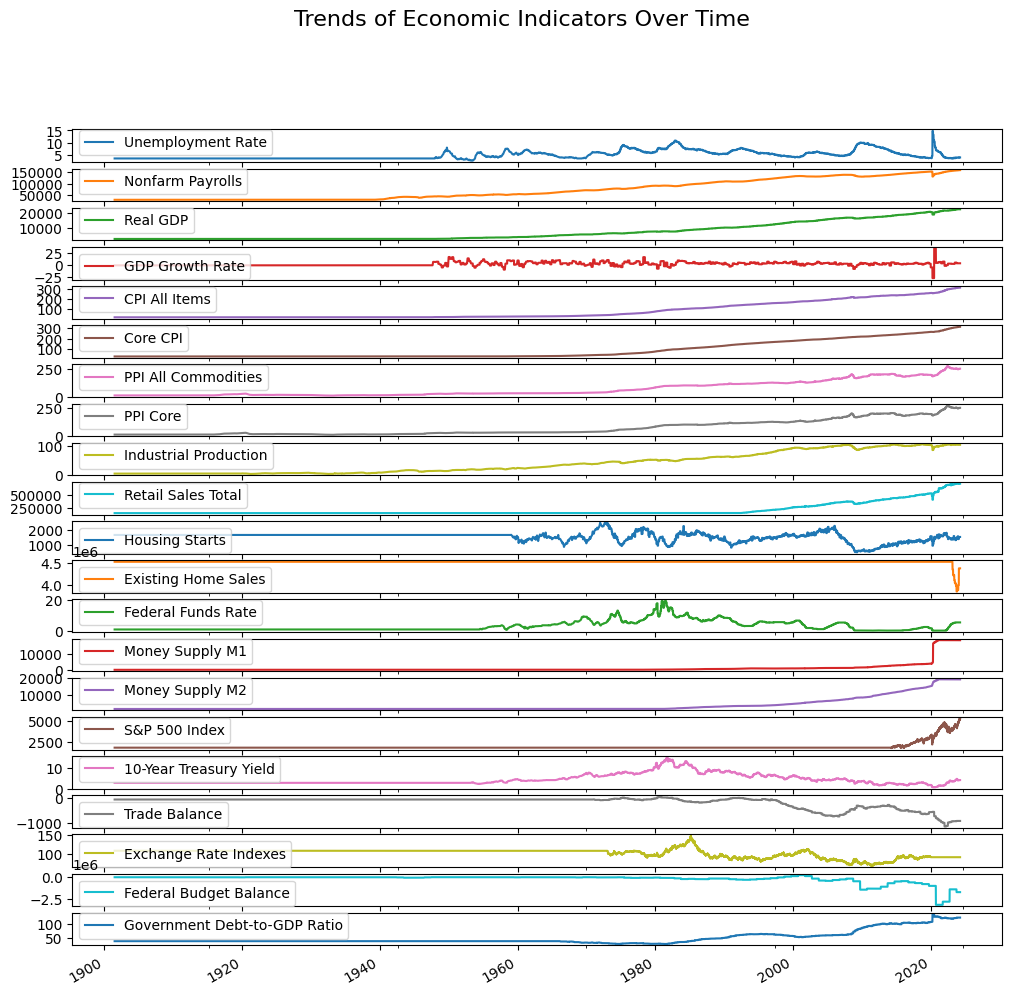

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Economic Indicators')
plt.show()

# Plot trends using line plots
plt.figure(figsize=(12, 8))
df.plot(subplots=True, figsize=(12, 12))
plt.suptitle('Trends of Economic Indicators Over Time', fontsize=16)
plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fredapi as fd
import plotly.express as px
import certifi
import ssl

ssl._create_default_https_context = ssl._create_unverified_context




In [7]:
fred=fd.Fred(api_key='b571120a022a2934188482315b1a8770')



In [8]:
pip install certifi

Note: you may need to restart the kernel to use updated packages.


In [9]:
data=fred.search('Consumer Price Index for All Urban Consumers: All Items in U.S. City Average')
data.head(10)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2024-04-03,2024-04-03,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2024-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-03-12 07:42:02-05:00,95,The Consumer Price Index for All Urban Consume...
CPIAUCNS,CPIAUCNS,2024-04-03,2024-04-03,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2024-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-03-12 07:42:05-05:00,73,Handbook of Methods (https://www.bls.gov/opub/...
CUUS0000SA0,CUUS0000SA0,2024-04-03,2024-04-03,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-01-11 07:40:07-06:00,46,None
CPILFESL,CPILFESL,2024-04-03,2024-04-03,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-03-12 07:42:02-05:00,82,"The ""Consumer Price Index for All Urban Consum..."
CPILFENS,CPILFENS,2024-04-03,2024-04-03,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-03-12 07:42:13-05:00,53,The “Consumer Price Index for All Urban Consum...
CUUS0000SA0L1E,CUUS0000SA0L1E,2024-04-03,2024-04-03,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-01-11 07:40:13-06:00,10,None
APU0000708111,APU0000708111,2024-04-03,2024-04-03,"Average Price: Eggs, Grade A, Large (Cost per ...",1980-01-01,2024-02-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-03-12 07:35:01-05:00,76,"Large white, Grade A chicken eggs, sold in a c..."
APU0000703112,APU0000703112,2024-04-03,2024-04-03,"Average Price: Ground Beef, 100% Beef (Cost pe...",1984-01-01,2024-02-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-03-12 07:35:02-05:00,68,Fresh regular 100% ground beef excluding round...
APU0000702111,APU0000702111,2024-04-03,2024-04-03,"Average Price: Bread, White, Pan (Cost per Pou...",1980-01-01,2024-02-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-03-12 07:35:01-05:00,68,All white pre-packaged regular bread regardles...


In [10]:
cpi = fred.get_series('CPIAUCSL')
cpi.name = 'values'
cpi


1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2023-10-01    307.531
2023-11-01    308.024
2023-12-01    308.742
2024-01-01    309.685
2024-02-01    311.054
Name: values, Length: 926, dtype: float64